In [1]:
import numpy as np
from scipy import misc, special, stats
import matplotlib as mlp
import matplotlib.pyplot as plt
mlp.style.use('classic')

%matplotlib inline

**Experiment:** Sample from Exponential distribution, and see how the distribution of sample mean ($\mu$) changes as sample size ($n$) increases

$$\mathrm{pdf} = \frac{1}{\beta} e^{-\frac{x}{\beta}}$$

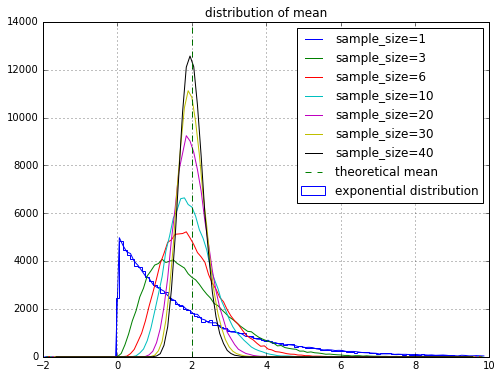

In [2]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

beta = 2
theoretical_mean = beta
theoretical_var = beta ** 2

bins = np.arange(-2, 10, 0.1)
num_samples = int(1e5)
for size in [1, 3, 6, 10, 20, 30, 40]:
    means = []
    for i in range(num_samples): # sample a thousand times each
        data = np.random.exponential(scale=beta, size=size)
        mean = np.mean(data)
        means.append(mean)
    hist, bins = np.histogram(means, bins=bins, density=False)
    bins = (bins[:-1] + bins[1:]) / 2
    ax.plot(bins, hist, label='sample_size={0}'.format(size))

# plot the distribution itself, should be equivalent to that when sample size is 1
data = np.random.exponential(scale=beta, size=num_samples)
ax.hist(data, bins=bins, histtype='step', label='exponential distribution')
    
ylim = ax.get_ylim()
ax.plot([theoretical_mean, theoretical_mean], ylim, '--', label='theoretical mean')
ax.set_ylim(ylim)
ax.legend()
ax.grid()
ax.set_title('distribution of mean')

Indeed, as central-limit-theorem says, as the sample size increases, the distribution of sample mean approximates a normal distribution. This won't be true if the sample size is too small. To the extreme, if the sample size is one (sampe_size=1), then the distribution of sample mean is the parent distribution itself.